In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_pozos_general = pd.read_csv('./data/capitulo-iv-pozos.csv')
df_pozos_convencional = pd.read_csv('./data/produccin-de-pozos-de-gas-y-petrleo-2024.csv', low_memory=False)
df_pozos_noconvencional = pd.read_csv('./data/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv', low_memory=False)

In [5]:
df_pozos_general.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,...,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...


In [17]:
df_pozos_convencional.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,...,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,...,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,...,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,...,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,...,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,...,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31


## Unicidad

**Capítulo IV Pozos**

In [24]:
df_pozos_general.columns

Index(['sigla', 'idpozo', 'area', 'cod_area', 'empresa', 'yacimiento',
       'cod_yacimiento', 'formacion', 'cuenca', 'provincia', 'cota',
       'profundidad', 'clasificacion', 'subclasificacion', 'tipo_recurso',
       'sub_tipo_recurso', 'gasplus', 'tipopozo', 'tipoextraccion',
       'tipoestado', 'adjiv_fecha_inicio_perf', 'adjiv_fecha_fin_perf',
       'adjiv_fecha_inicio_term', 'adjiv_fecha_fin_term', 'geojson', 'geom'],
      dtype='object')

Conceptualmente, la clave primaria de cada observación es el campo "id_pozo". Sin embargo, en el caso de los datos de producción de pozos convencionales y no convencionales, la clave primaria es la combinación de los campos "id_pozo".

In [9]:
unique_pozos = df_pozos_general[['idpozo']].drop_duplicates()
print('Proporción de pozos únicos:', f"{unique_pozos.shape[0] / df_pozos_general.shape[0]:.3%}")

Proporción de pozos únicos: 100.000%


**Convencional**

Acá tenemos otros datos (mes, año, empresa). Estas se agregan a la clave

In [12]:
df_pozos_convencional.columns

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyecto',
       'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data'],
      dtype='object')

In [13]:
unique_pozos = df_pozos_convencional[['idpozo', 'idempresa', 'anio', 'mes']].drop_duplicates()
print('Proporción de registros únicos:', f"{unique_pozos.shape[0] / df_pozos_convencional.shape[0]:.3%}")

Proporción de pozos únicos: 100.000%


**No convencional**

In [15]:
unique_pozos = df_pozos_noconvencional[['idpozo', 'idempresa', 'anio', 'mes']].drop_duplicates()
print('Proporción de registros únicos:', f"{unique_pozos.shape[0] / df_pozos_noconvencional.shape[0]:.3%}")

Proporción de registros únicos: 100.000%


## Consistencia dentro de cada fuente

**Capítulo IV Pozos**

Cada `id_pozo` debe tener una única sigla, y viceversa.

In [23]:
unique_sigla = df_pozos_general[['sigla']].drop_duplicates()
unique_pozos = df_pozos_general[['idpozo']].drop_duplicates()
print('Razón entre siglas únicas y IDs únicos:', f"{unique_sigla.shape[0] / unique_pozos.shape[0]:.3f}")

Razón entre siglas únicas y IDs únicos: 0.914


Hay IDs para los cuales se repite la sigla, pues hay más IDs que siglas, lo cual representa un problema.

Cada `id_pozo` debe tener una única coordenada, y viceversa.

In [25]:
unique_coord = df_pozos_general[['geojson']].drop_duplicates()
unique_pozos = df_pozos_general[['idpozo']].drop_duplicates()
print('Razón entre coordenadas únicas y IDs únicos:', f"{unique_coord.shape[0] / unique_pozos.shape[0]:.3f}")

Razón entre coordenadas únicas y IDs únicos: 0.923


La fecha de inicio de perforación debe ser menor a la fecha de fin de perforación.

In [26]:
df_pozos_general['adjiv_fecha_inicio_perf'] = pd.to_datetime(df_pozos_general['adjiv_fecha_inicio_perf'])
df_pozos_general['adjiv_fecha_fin_perf'] = pd.to_datetime(df_pozos_general['adjiv_fecha_fin_perf'])

print("Proporción de fechas donde el inicio es anterior al fin:", f"{(df_pozos_general['adjiv_fecha_inicio_perf'] < df_pozos_general['adjiv_fecha_fin_perf']).sum() / df_pozos_general.shape[0]:.3%}")

Proporción de fechas donde el inicio es anterior al fin: 58.457%


Graficamos histograma de diferencia de días

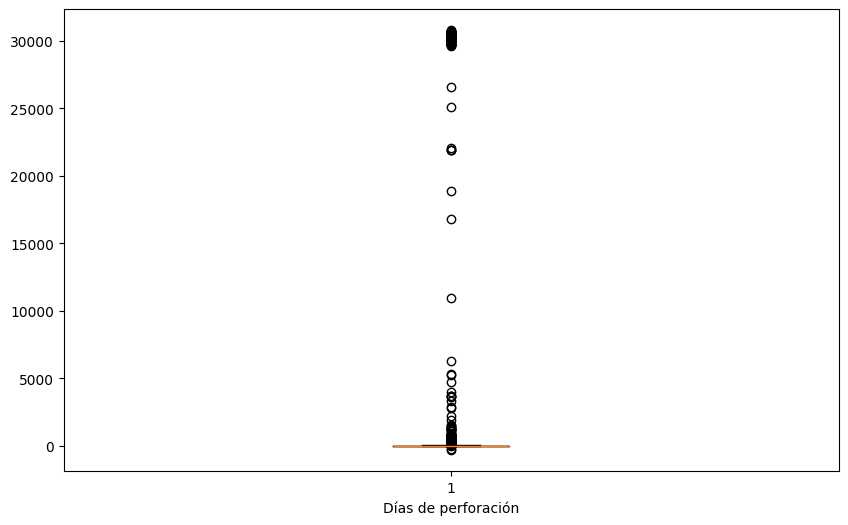

In [36]:
# Boxplot de días de perforación

df_pozos_general['dias_perforacion'] = (df_pozos_general['adjiv_fecha_fin_perf'] - df_pozos_general['adjiv_fecha_inicio_perf']).dt.days

plt.figure(figsize=(10, 6))
plt.boxplot(df_pozos_general['dias_perforacion'].dropna())
plt.xlabel('Días de perforación')
plt.show()


Un problema similar al de las siglas ocurre para las coordenadas.

**No convencional**

In [21]:
tipo_recurso_no_conv = np.sum(df_pozos_noconvencional['tipo_de_recurso'] == 'NO CONVENCIONAL')
print('Proporción de pozos no convencionales:', f"{tipo_recurso_no_conv / df_pozos_noconvencional.shape[0]:.3%}")

Proporción de pozos no convencionales: 100.000%
